Automatically created module for IPython interactive environment
------- X.shape ---------
(150, 4)
------- E.shape ---------
(150, 20)
------- X.shape ---------
(150, 24)
------- X.shape[-1] ---------
24
------- X_indices ---------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
------- selector.pvalues_ ---------
[1.30445334e-24 4.69398374e-13 7.86826504e-65 6.71208699e-65
 9.19263331e-02 7.68247566e-01 6.97135407e-03 8.71072262e-01
 2.89870410e-01 5.17260313e-01 6.93915953e-01 6.38021592e-01
 5.40267165e-01 3.89960477e-01 6.61741719e-01 4.45807702e-01
 8.70827786e-01 2.77518368e-01 7.02334600e-01 9.10686642e-01
 8.49305964e-01 3.24574351e-01 8.42484503e-01 2.86600077e-02]
------- scores ---------
[2.38845715e+01 1.23284584e+01 6.41041210e+01 6.41731424e+01
 1.03656006e+00 1.14498807e-01 2.15668286e+00 5.99458155e-02
 5.37796116e-01 2.86290842e-01 1.58693128e-01 1.95164624e-01
 2.67391426e-01 4.08979407e-01 1.79311485e-01 3.50852433e-01
 6.00677223e-02 5.567

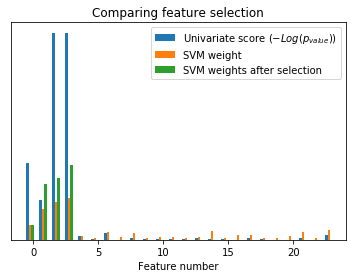

In [8]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
X, y = load_iris(return_X_y=True)

print("------- X.shape ---------")
print(X.shape)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

print("------- E.shape ---------")
print(E.shape)


# Add the noisy data to the informative features
X = np.hstack((X, E))

print("------- X.shape ---------")
print(X.shape)


# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0
)

plt.figure(1)
plt.clf()


print("------- X.shape[-1] ---------")
print(X.shape[-1])


X_indices = np.arange(X.shape[-1])

print("------- X_indices ---------")
print(X_indices)



# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)


print("------- selector.pvalues_ ---------")
print(selector.pvalues_)


scores = -np.log10(selector.pvalues_)

print("------- scores ---------")
print(scores)



scores /= scores.max()


print("------- scores ---------")
print(scores)


plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')




# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())

clf.fit(X_train, y_train)

print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))


print("------- clf[-1].coef_ ---------")
print(clf[-1].coef_)

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)

print("------- svm_weights ---------")
print(svm_weights)

svm_weights /= svm_weights.sum()


print("------- svm_weights ---------")
print(svm_weights)


plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')






clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)

clf_selected.fit(X_train, y_train)

print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))


print("------- clf_selected[-1].coef_ ---------")
print(clf_selected[-1].coef_)


svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)


print("------- svm_weights_selected ---------")
print(svm_weights_selected)

svm_weights_selected /= svm_weights_selected.sum()

print("------- svm_weights_selected ---------")
print(svm_weights_selected)


print("------- selector.get_support() ---------")
print(selector.get_support())

print("------- X_indices[selector.get_support()] ---------")
print(X_indices[selector.get_support()])

print("------- X_indices[selector.get_support()] - .05 ---------")
print(X_indices[selector.get_support()] - .05)

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

Automatically created module for IPython interactive environment
------- X.shape -----------
(1000, 3)
------- y.shape -----------
(1000,)
------- f_test -----------
[1.         0.28024353 0.00252204]
------- mi -----------
[0.36448455 1.         0.        ]


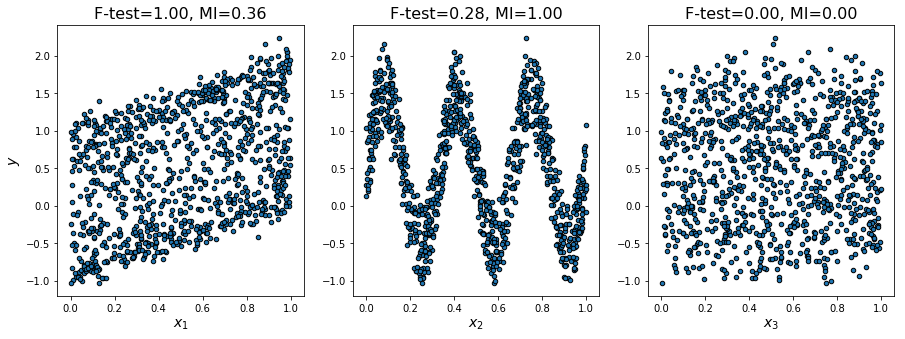

In [11]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)


print("------- X.shape -----------")
print(X.shape)

print("------- y.shape -----------")
print(y.shape)



f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

print("------- f_test -----------")
print(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

print("------- mi -----------")
print(mi)



plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

In [13]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
print(X.shape)
print(X)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)
print(X_new)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

C:\Users\efnxqng\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Model-based and sequential feature selection

This example illustrates and compares two approaches for feature selection:
:class:`~sklearn.feature_selection.SelectFromModel` which is based on feature
importance, and
:class:`~sklearn.feature_selection.SequentialFeatureSelection` which relies
on a greedy approach.

We use the Diabetes dataset, which consists of 10 features collected from 442
diabetes patients.

Authors: `Manoj Kumar <mks542@nyu.edu>`_,
`Maria Telenczuk <https://github.com/maikia>`_, Nicolas Hug.

License: BSD 3 clause

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

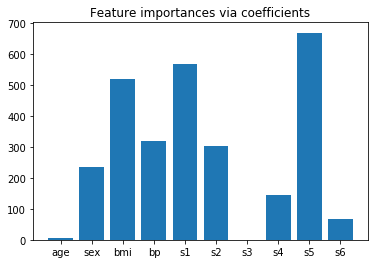

Features selected by SelectFromModel: ['s1' 's5']
Done in 0.262s


ImportError: cannot import name 'SequentialFeatureSelector' from 'sklearn.feature_selection' (C:\Users\efnxqng\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\__init__.py)

In [14]:
"""
============================================
Model-based and sequential feature selection
============================================

This example illustrates and compares two approaches for feature selection:
:class:`~sklearn.feature_selection.SelectFromModel` which is based on feature
importance, and
:class:`~sklearn.feature_selection.SequentialFeatureSelection` which relies
on a greedy approach.

We use the Diabetes dataset, which consists of 10 features collected from 442
diabetes patients.

Authors: `Manoj Kumar <mks542@nyu.edu>`_,
`Maria Telenczuk <https://github.com/maikia>`_, Nicolas Hug.

License: BSD 3 clause
"""

print(__doc__)


# %%
# Loading the data
# ----------------
#
# We first load the diabetes dataset which is available from within
# scikit-learn, and print its description:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

# %%
# Feature importance from coefficients
# ------------------------------------
#
# To get an idea of the importance of the features, we are going to use the
# :class:`~sklearn.linear_model.LassoCV` estimator. The features with the
# highest absolute `coef_` value are considered the most important.
# We can observe the coefficients directly without needing to scale them (or
# scale the data) because from the description above, we know that the features
# were already standardized.
# For a more complete example on the interpretations of the coefficients of
# linear models, you may refer to
# :ref:`sphx_glr_auto_examples_inspection_plot_linear_model_coefficient_interpretation.py`.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

# %%
# Selecting features based on importance
# --------------------------------------
#
# Now we want to select the two features which are the most important according
# to the coefficients. The :class:`~sklearn.feature_selection.SelectFromModel`
# is meant just for that. :class:`~sklearn.feature_selection.SelectFromModel`
# accepts a `threshold` parameter and will select the features whose importance
# (defined by the coefficients) are above this threshold.
#
# Since we want to select only 2 features, we will set this threshold slightly
# above the coefficient of third most important feature.
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(lasso, threshold=threshold).fit(X, y)
toc = time()
print("Features selected by SelectFromModel: "
      f"{feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

# %%
# Selecting features with Sequential Feature Selection
# ----------------------------------------------------
#
# Another way of selecting features is to use
# :class:`~sklearn.feature_selection.SequentialFeatureSelector`
# (SFS). SFS is a greedy procedure where, at each iteration, we choose the best
# new feature to add to our selected features based a cross-validation score.
# That is, we start with 0 features and choose the best single feature with the
# highest score. The procedure is repeated until we reach the desired number of
# selected features.
#
# We can also go in the reverse direction (backward SFS), *i.e.* start with all
# the features and greedily choose features to remove one by one. We illustrate
# both approaches here.

from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(lasso, n_features_to_select=2,
                                        direction='forward').fit(X, y)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(lasso, n_features_to_select=2,
                                         direction='backward').fit(X, y)
toc_bwd = time()

print("Features selected by forward sequential selection: "
      f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print("Features selected by backward sequential selection: "
      f"{feature_names[sfs_backward.get_support()]}")
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

# %%
# Discussion
# ----------
#
# Interestingly, forward and backward selection have selected the same set of
# features. In general, this isn't the case and the two methods would lead to
# different results.
#
# We also note that the features selected by SFS differ from those selected by
# feature importance: SFS selects `bmi` instead of `s1`. This does sound
# reasonable though, since `bmi` corresponds to the third most important
# feature according to the coefficients. It is quite remarkable considering
# that SFS makes no use of the coefficients at all.
#
# To finish with, we should note that
# :class:`~sklearn.feature_selection.SelectFromModel` is significantly faster
# than SFS. Indeed, :class:`~sklearn.feature_selection.SelectFromModel` only
# needs to fit a model once, while SFS needs to cross-validate many different
# models for each of the iterations. SFS however works with any model, while
# :class:`~sklearn.feature_selection.SelectFromModel` requires the underlying
# estimator to expose a `coef_` attribute or a `feature_importances_`
# attribute. The forward SFS is faster than the backward SFS because it only
# needs to perform `n_features_to_select = 2` iterations, while the backward
# SFS needs to perform `n_features - n_features_to_select = 8` iterations.


In [17]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)

print(X.shape)
print(X)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)

print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X)
print(X_new.shape)
print(X_new)


(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6


Model-based and sequential feature selection

This example illustrates and compares two approaches for feature selection:
:class:`~sklearn.feature_selection.SelectFromModel` which is based on feature
importance, and
:class:`~sklearn.feature_selection.SequentialFeatureSelection` which relies
on a greedy approach.

We use the Diabetes dataset, which consists of 10 features collected from 442
diabetes patients.

Authors: `Manoj Kumar <mks542@nyu.edu>`_,
`Maria Telenczuk <https://github.com/maikia>`_, Nicolas Hug.

License: BSD 3 clause

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


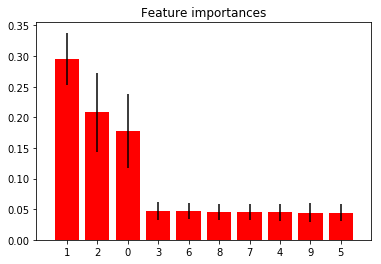

In [18]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()